# Organização de dados, frequências, proporções e taxas

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
camaras = pd.read_csv('https://github.com/jtrecenti/main-cdad2/releases/download/data/camaras.csv')

## Introdução

Nessa análise, nosso interesse é estudar as decisões do TJSP em apelações criminais. Vamos estudar as quantidades, proporções e distribuições de decisões de acordo com as categorias de decisões.

**Por que isso é importante?** A maior parte dos dados no direito envolvem variáveis categóricas. Entender como esse tipo de dados funciona é fundamental para entender o que podemos e não podemos fazer nas nossas análises.

## Conceitos

Para cada conceito, vamos mostrar a definição, a fórmula matemática e o código em python para calcular.

### Frequência

#### Definição

A **frequência** é a quantidade de ocorrências de uma observação, objeto, pessoa, processo, etc. Geralmente, está atrelada a variáveis categóricas, tanto nominais quanto ordinais.

#### Fórmula

A fórmula aqui é bem simples: basta contar a quantidade de vezes que cada categoria aparece. Geralmente, denotamos a frequência pela variável $n_i$, sendo $i$ a categoria.

$$n_i = \text{número de vezes que a categoria } i \text{ aparece}$$

#### Código

A frequência de uma variável pode ser rapidamente obtida com `value_counts()`

In [4]:
camaras.decisao.value_counts()

decisao
Negaram                 5273
Parcialmente            3691
Provido                  716
Punibilidade Extinta     238
Outros                    66
Não conhecido             16
Name: count, dtype: int64

Aqui, $n_1$ é 5273, $n_2$ é 3691 e assim por diante.

### Frequência relativa

#### Definição

A **frequência relativa** é a proporção de ocorrências de uma observação, objeto, pessoa, processo, etc. em relação ao total de ocorrências. Também está atrelada a variáveis categóricas, tanto nominais quanto ordinais.

#### Fórmula

Basta dividir a frequência da categoria pela quantidade total de observações na amostra ($N$). Denotamos a frequência relativa pela variável $f_i$, sendo $i$ a categoria.

$$f_i = \frac{n_i}{N}$$

#### Código

O argumento 'normalize=' permite obter a frequência relativa - não o total de ocorrências.

In [5]:
camaras.decisao.value_counts(normalize=True)

decisao
Negaram                 0.5273
Parcialmente            0.3691
Provido                 0.0716
Punibilidade Extinta    0.0238
Outros                  0.0066
Não conhecido           0.0016
Name: proportion, dtype: float64

A frequência relativa, quando expressa na forma de porcentagem, também é chamada de **proporção**. A proporção de decisões negadas dentre todas as decisões é de 0.5273 (frequência relativa) ou 52.73% (proporção).

**Obs**: Você não precisa se prender muito a essa distinção rígida de frequência relativa e proporção. No mundo real, as pessoas usam os termos de forma intercambiável, e não há problema nenhum nisso.

**Obs2**: Quando calculamos todas as proporções/frequências relativas de uma variável categórica, a soma delas é 1 (ou 100%, se expressa em porcentagem). Isso é uma propriedade das proporções.

**Obs3**: Quando mostramos todas as proporções/frequências relativas de uma variável categórica, estamos mostrando a **distribuição** da variável. A distribuição é a forma como as categorias estão distribuídas em relação ao total de observações. Falaremos mais sobre isso quando discutirmos os conceitos de *estatística* e *probabilidade*.

### Razão

Você percebeu que, para fazer a proporção, dividimos uma frequência pela quantidade total de observações? Isso é uma **razão**.

#### Definição

A razão é a divisão entre duas quantidades de interesse. No caso da frequência relativa, estamos comparando a quantidade de vezes que uma categoria aparece com a quantidade total de observações. Mas a razão pode ser usada para comparar qualquer coisa.

#### Fórmula

Basta dividir a quantidade de interesse pela outra quantidade de interesse. Denotamos a razão pela variável $r$.

$$r = \frac{a}{b}$$

Na fórmula, $a$ e $b$ podem ser quaisquer números. No caso da frequência relativa, $a$ é a quantidade de vezes que uma categoria aparece e $b$ é a quantidade total de observações.

#### Código

A razão é obtida dividindo-se os dois números de interesse. Por exemplo, se quisermos saber quantos recursos relacionados a tráfico de drogas temos para cada recurso relacionado a furto, basta dividir a frequência de recursos de tráfico pela frequência de recursos de furto.

In [4]:
pd.set_option('display.max_colwidth', None) # Mostrar todas as colunas

camaras.value_counts('assunto').reset_index()

,assunto,count
0,DIREITO PENAL - Crimes Previstos na Legislação Extravagante - Crimes de Tráfico Ilícito e Uso Indevido de Drogas - Tráfico de Drogas e Condutas Afins,3082
1,DIREITO PENAL - Crimes contra o Patrimônio - Roubo Majorado,1397
2,DIREITO PENAL - Crimes contra o Patrimônio - Furto Qualificado,1122
3,DIREITO PENAL-Crimes contra o Patrimônio-Furto,577
4,DIREITO PENAL - Crimes Previstos na Legislação Extravagante - Crimes de Trânsito,458
...,...,...
115,DIREITO PENAL - Crimes Praticados por Particular Contra a Administração em Geral - Subtração ou inutilização de livro ou documento,1
116,DIREITO PENAL - Crimes Contra a Administração da Justiça - Favorecimento real,1
117,"DIREITO PENAL - Crimes Praticados por Particular Contra a Administração em Geral - ""Lavagem"" ou Ocultação de Bens, Direitos ou Valores Oriundos de Corrupção",1
118,DIREITO PENAL - Crimes Praticados por Particular Contra a Administração em Geral - Contrabando ou descaminho,1


In [5]:
assuntos_trafico = [
  'DIREITO PENAL - Crimes Previstos na Legislação Extravagante - Crimes de Tráfico Ilícito e Uso Indevido de Drogas - Tráfico de Drogas e Condutas Afins'
]

assuntos_furto = [
  'DIREITO PENAL - Crimes contra o Patrimônio - Furto Qualificado',
  'DIREITO PENAL-Crimes contra o Patrimônio-Furto'
]

qt_trafico = camaras[camaras.assunto.isin(assuntos_trafico)].shape[0]

qt_furto = camaras[camaras.assunto.isin(assuntos_furto)].shape[0]

razao = qt_trafico / qt_furto

qt_trafico, qt_furto, razao

(3082, 1699, 1.8140082401412596)

Temos aproximadamente 1.81 recursos relacionados a tráfico para cada recurso relacionado a furto.

Também podemos representar as razões multiplicando por valores constantes (usualmente potências de 10, como 100, 1000, etc). Por exemplo, a razão acima poderia ser expressa como 181 casos de tráfico para cada 100 casos de furto, ou 181:100.

### Taxa

#### Definição

No inglês, **rate** é a divisão entre dois números com unidades de medidas diferentes (por exemplo, km/h). Já a razão **ratio** é a divisão entre dois números com a mesma unidade de medida (como o exemplo mostrado acima).

Na prática, muitas vezes chamamos uma razão de taxa, mesmo que os números tenham a mesma unidade de medida. Isso acontece por vários motivos: um é a comodidade e questões culturais mesmo; outro é que na área de epidemiologia, a definição de taxa geralmente está atrelada a um denominador que varia no tempo (como, por exemplo, taxa de mortalidade, que varia no tempo porque a população varia no tempo).

Um exemplo, muito usado em administração judiciária, é a **taxa de congestionamento**. Aqui, o numerador é o número de processos remanescentes no tribunal -- fazendo-se a diferença entre o total de processos (novos + pendentes) e o total de processos baixados -- e o denominador é o número total de processos (novos + pendentes).

Outro exemplo é a taxa de reforma. O numerador é o número de decisões favoráveis ao recurso e o denominador é o número total de recursos baixados.

**Obs:** existem variações para a definição da taxa de reforma. Um exemplo é considerar no denominador apenas as decisões que poderiam ser reformadas, ou seja, as decisões de mérito.

#### Fórmula

A fórmula é a mesma da razão, mas a interpretação é diferente. Denotamos a taxa pela variável $t$.

$$t = \frac{a}{b}$$

Na fórmula, $a$ e $b$ podem ser quaisquer números. No caso da taxa de reforma, $a$ é o número de decisões favoráveis e desfavoráveis e $b$ é o número total de decisões.

#### Código

A taxa é obtida dividindo-se os dois números de interesse. Por exemplo, se quisermos saber a taxa de reforma, basta dividir a frequência de decisões favoráveis pela frequência de decisões (total ou de mérito).

In [6]:
qt_decisoes_total = camaras.shape[0]

nm_decisoes_merito = ['Negaram', 'Parcialmente', 'Provido']

qt_decisoes_merito = camaras[camaras.decisao.isin(nm_decisoes_merito)].shape[0]
qt_decisoes_favoraveis = camaras[camaras.decisao.isin(['Parcialmente', 'Provido'])].shape[0]

tx_reforma_total = qt_decisoes_favoraveis / qt_decisoes_total
tx_reforma_merito = qt_decisoes_favoraveis / qt_decisoes_merito

tx_reforma_total, tx_reforma_merito

(0.4407, 0.45526859504132233)

## Aplicação

A quantidade ou proporção de recursos negados nas câmaras criminais pode variar de acordo com o polo do Ministério Público no caso. Afinal, se um magistrado tem um viés mais ou menos favorável ao MP, a quantidade de recursos negados pode variar.

In [5]:
len(camaras[(camaras.polo_mp == "Ativo") & (camaras.decisao == "Negaram")])

358

In [6]:
len(camaras[(camaras.polo_mp == "Passivo") & (camaras.decisao == "Negaram")])

4915

A frequência de recursos negados nos casos em que o MP recorreu (polo ativo) é 358. Quando o MP está no polo passivo, esse número é de 4915. O que isso revela sobre o viés do tribunal com relação ao MP? O fato de existirem menos recursos negados quando o MP recorre pode ser um indício de que o tribunal é mais favorável ao MP?

Talvez a diferença seja apenas uma questão de quantidade de recursos interpostos pelo MP em relação ao polo passivo. Afinal, se o MP recorre em menos casos, é natural que haja menos recursos negados.

A proporção de recursos negados para cada tipo de polo do MP é o que de fato deve ser comparado nesse caso.

In [7]:
freq = len(camaras[(camaras.polo_mp == "Ativo") & (camaras.decisao == "Negaram")])
N = len(camaras[camaras.polo_mp == "Ativo"])

In [8]:
P_ativo = freq / N
P_ativo

0.44143033292231815

In [10]:
freq = len(camaras[(camaras.polo_mp == "Passivo") & (camaras.decisao == "Negaram")])
N = len(camaras[camaras.polo_mp == "Passivo"])

In [19]:
P_passivo = freq / N
P_passivo

0.5348786592665143

A proporção de negados quando o MP está no polo passivo é maior do que a proporção de negados no polo ativo. Isso pode ser um indício de que o tribunal é mais favorável ao MP quando este recorre. Claro que ainda existem muitos fatores a serem considerados (veremos mais para frente!).

A partir de agora, vamos considerar somente os recursos onde o MP está no polo passivo. Também vamos considerar somente as decisões de mérito.

In [31]:
camaras_mp_passivo = (
  camaras
  .query('polo_mp == "Passivo"')
  .query('decisao == ["Negaram", "Parcialmente", "Provido"]')
)

Uma análise de interesse pode ser calcular a taxa de reforma por assunto do processo. Será que existe muita variação?

Na análise abaixo, estimamos essas proporções, considerando apenas os assuntos com 30 ou mais decisões (tente pensar no motivo dessa decisão).

In [33]:
(
  camaras_mp_passivo
  .groupby('assunto')
  .agg(
    decisoes = ('decisao', 'count'),
    reforma = ('decisao', lambda x: (x.isin(['Provido', 'Parcialmente'])).mean())
  )
  .reset_index()
  .query('decisoes >= 30')
  .sort_values('reforma', ascending=False)
)


,assunto,decisoes,reforma
60,DIREITO PENAL - Crimes contra o Patrimônio - Latrocínio,44,0.568182
38,DIREITO PENAL - Crimes Previstos na Legislação Extravagante - Crimes de Trânsito,394,0.530457
98,DIREITO PENAL-Crimes contra o Patrimônio-Estelionato,178,0.511236
58,DIREITO PENAL - Crimes contra o Patrimônio - Furto Qualificado,1008,0.497024
52,DIREITO PENAL - Crimes contra a Fé Pública - Uso de documento falso,84,0.488095
63,DIREITO PENAL - Crimes contra o Patrimônio - Roubo Majorado,1296,0.475309
37,DIREITO PENAL - Crimes Previstos na Legislação Extravagante - Crimes de Tráfico Ilícito e Uso Indevido de Drogas - Tráfico de Drogas e Condutas Afins,2787,0.454970
96,DIREITO PENAL-Crimes contra o Patrimônio-Apropriação indébita,66,0.439394
101,DIREITO PENAL-Crimes contra o Patrimônio-Furto,486,0.413580
93,DIREITO PENAL-Crimes contra a vida-Homicídio Qualificado,77,0.402597


Pela tabela, vemos que a taxa de reforma varia de 0.30 a 0.57. O assunto com maior taxa de reforma é o latrocínio, seguido por crimes de trânsito. Já o assunto com menor taxa de reforma é a violação de direito autoral.

Outra análise de interesse é estudar a taxa de reforma por câmara. A tabela abaixo mostra isso. dessa vez, estamos mostrando apenas as câmaras com mais de 100 observações, para remover as câmaras extraordinárias.

In [36]:
camara_reforma = (
  camaras_mp_passivo
  .groupby('camara')
  .agg(
    decisoes = ('decisao', 'count'),
    reforma = ('decisao', lambda x: (x.isin(['Provido', 'Parcialmente'])).mean())
  )
  .reset_index()
  .query('decisoes >= 100')
  .sort_values('reforma', ascending=False)
)

camara_reforma

Dessa vez, a taxa de reforma varia de 0.12 até 0.79! Pela tabela, a câmara com maior taxa de reforma é a 12 e a câmara com menor taxa de reforma é a 4.

Podemos ver esses dados graficamente:

<Axes: xlabel='reforma', ylabel='camara'>

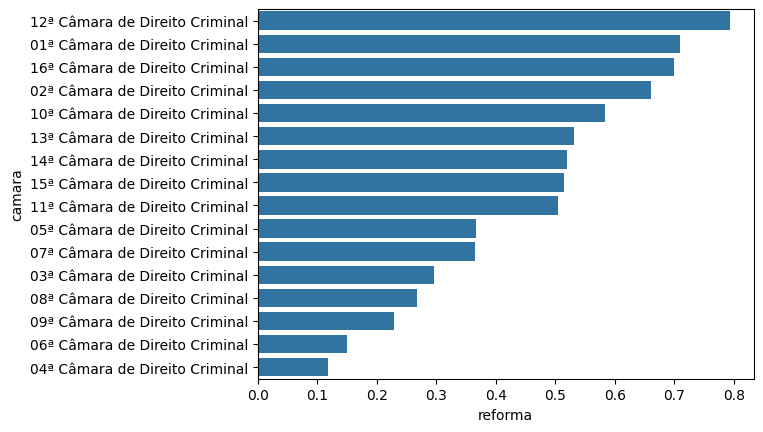

In [40]:
sns.barplot(data=camara_reforma, x='reforma', y='camara')

Na apostila sobre visualização de dados, veremos como customizar esse gráfico.